# Regression Testing

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [125]:
reg_question = pd.read_csv("/home/pranavhegde/Downloads/Stack/Questions.csv", nrows=10000,usecols =['Id', 'OwnerUserId', 'CreationDate', 'ClosedDate', 'Score','Title','Body'],encoding='latin1')
reg_question = reg_question.dropna()
reg_question.head(2)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
6,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...


In [126]:
reg_Answers= pd.read_csv("/home/pranavhegde/Downloads/Stack/Answers.csv", nrows=10000,usecols =['Id', 'OwnerUserId', 'CreationDate', 'ParentId', 'Score','Body'],encoding='latin1')
reg_Answers = reg_Answers.dropna()
reg_Answers.head(2)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...


In [127]:
reg_Tags= pd.read_csv("/home/pranavhegde/Downloads/Stack/Tags.csv", nrows=10000,usecols =['Id', 'Tag'],encoding='latin1')
reg_Tags = reg_Tags.dropna()
reg_Tags.head(2)

,Id,Tag
0,80,flex
1,80,actionscript-3


In [128]:
# Columns list
print(reg_question.columns.tolist())

['Id', 'OwnerUserId', 'CreationDate', 'ClosedDate', 'Score', 'Title', 'Body']


In [129]:
# Columns list
print(reg_Answers.columns.tolist())

['Id', 'OwnerUserId', 'CreationDate', 'ParentId', 'Score', 'Body']


In [130]:
# Columns list
print(reg_Tags.columns.tolist())

['Id', 'Tag']


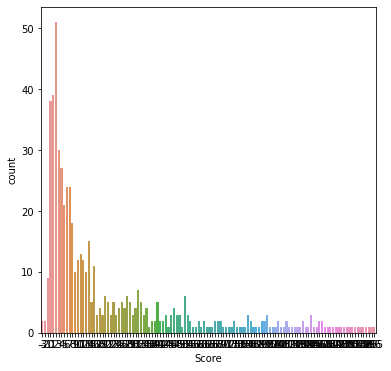

In [131]:
# Barplot for Number Scores Given for the Questions
plt.figure(figsize=(6,6))
sns.countplot(x='Score',data=reg_question);

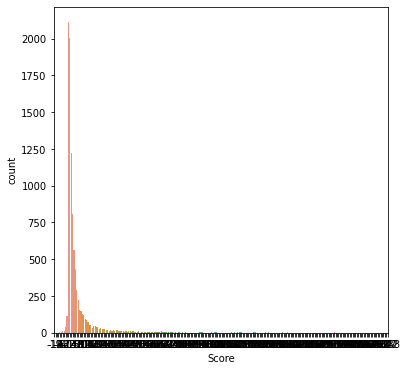

In [132]:
# Barplot for Number Scores Given for the Answers
plt.figure(figsize=(6,6))
sns.countplot(x='Score',data=reg_Answers);

Total number of questions 66


Text(0, 0.5, 'Number of tags')

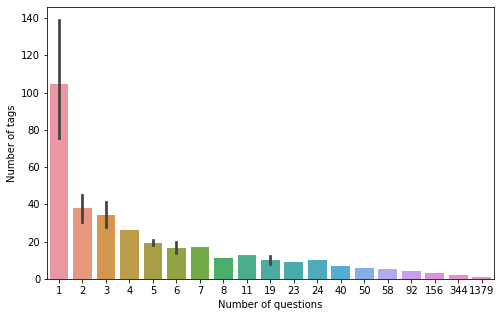

In [133]:
plt.figure(figsize=(8,5))
counts = reg_Tags['Tag'].value_counts()
counts = counts.value_counts()
print("Total number of questions " + str(len(counts)))
sns.barplot(x=counts,y=counts.index)
plt.xlabel("Number of questions")
plt.ylabel("Number of tags")

In [134]:
#Regression Model
# These are the columns which are independant variables
colm1 = ['Id']

In [135]:
X = reg_question[colm1]
y = reg_question['Score']

In [136]:
# If anything has empty value then fill it with 0.0
X.fillna(0.0,inplace=True) 

/usr/lib/python3/dist-packages/pandas/core/frame.py:4252: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [137]:
# Split the dataset for training and testing
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
L = [0.00001,0.001,0.01,0.1,1,10] # These are regularization constant(C) using in regression
accuracy = {}
for i in L:
    LR = LogisticRegression(C=i)
    LR.fit(train_X,train_y)
    pred_y = LR.predict(test_X) # Prediction for testing dataset

    accuracy[i]=100*accuracy_score(pred_y,test_y)


/home/pranavhegde/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/pranavhegde/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [140]:
#Printing the accuracy
accuracy

{1e-05: 4.545454545454546,
 0.001: 4.545454545454546,
 0.01: 4.545454545454546,
 0.1: 4.545454545454546,
 1: 4.545454545454546,
 10: 4.545454545454546}

Counter({0: 9900, 1: 100})


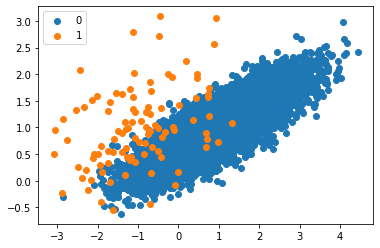

In [142]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [143]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         1
          -1       0.00      0.00      0.00         3
           0       0.00      0.00      0.00        11
           1       0.05      1.00      0.09         8
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         6
          15       0.00    

/home/pranavhegde/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Accuracy')

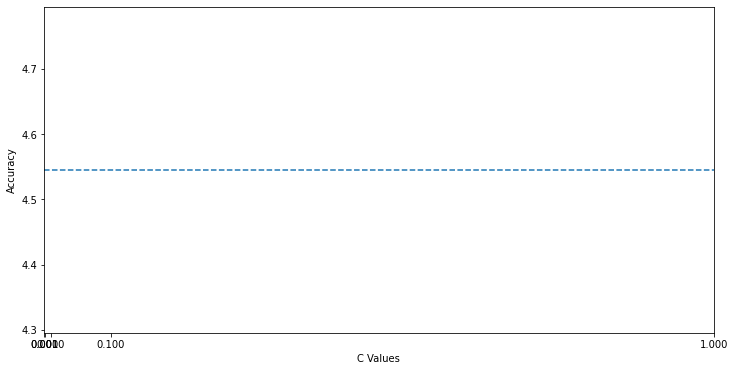

In [144]:
# C values vs Accuacy curve
plt.figure(figsize=(12,6))
plt.plot( list(accuracy.keys()), list(accuracy.values()), '--')
plt.xticks(list(accuracy.keys()))
plt.xlim(0,1)
plt.xlabel("C Values")
plt.ylabel("Accuracy")

In [174]:
#Here we are taking the c value as 0.526 as constant
LR = LogisticRegression(C=0.526)
LR.fit(train_X,train_y)
pred_y = LR.predict(test_X)

/home/pranavhegde/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [175]:
# Confusion metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_y,test_X)

array([[0, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [176]:
# Final accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(pred_y,test_y)

0.045454545454545456

In [177]:
# Contribution of each variable
LR.coef_

array([[-4.74878853e-06],
       [ 3.37920517e-06],
       [ 6.24083649e-06],
       [ 8.93726733e-06],
       [ 9.26313399e-06],
       [ 9.20896665e-06],
       [ 8.43559981e-06],
       [ 8.00829507e-06],
       [ 7.76877729e-06],
       [ 7.58304218e-06],
       [ 7.35707732e-06],
       [ 5.35067890e-06],
       [ 6.03720096e-06],
       [ 6.66187214e-06],
       [ 6.39302092e-06],
       [ 5.49572014e-06],
       [ 7.97535631e-07],
       [ 5.15229291e-06],
       [ 4.51038493e-06],
       [ 5.77801210e-06],
       [ 3.39917185e-06],
       [ 2.22013161e-06],
       [ 3.61803496e-06],
       [ 4.85880643e-06],
       [ 5.50014776e-06],
       [ 1.71455708e-06],
       [-1.15034531e-05],
       [-1.04368605e-06],
       [ 2.04182597e-06],
       [ 4.86374773e-06],
       [ 4.71506251e-06],
       [ 3.19347798e-06],
       [ 4.25868284e-06],
       [ 2.83631334e-06],
       [ 2.21795002e-06],
       [ 5.52217913e-06],
       [ 2.92627553e-06],
       [-6.81272807e-06],
       [ 2.9

In [183]:
# # ROC and AUC
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# logit_roc_auc = roc_auc_score(pred_y, LR.predict(test_X))
# fpr, tpr, thresholds = roc_curve(pred_y, LR.predict_proba(test_X)[:,1])
# plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Logisic Regeression Curve')
# plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
# plt.show()
# # (pred_y,test_X)